# 금융데이터베이스 G조

## Import, Data Download

In [1]:
import requests
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

In [2]:
import matplotlib.pyplot as plt

### BOK Data Download

In [3]:
BOK_API_URL='https://ecos.bok.or.kr/api'
BOK_API_KEY = 'PPD6XQHMF1G7QOBTPGMJ'

In [4]:
def fetch_bok_data(service_code,stat_code=None, item=None):
    url = f"{BOK_API_URL}/{service_code}/{BOK_API_KEY}/json/kr/1/100000"
    if item is not None:
        url +="/{}/{}/{}/{}/{}".format(
            item['STAT_CODE'],
            item['CYCLE'],
            item['START_TIME'],
            item['END_TIME'],
            item['ITEM_CODE'],
        )
        if type(item['ITEM_CODE2']) is str: 
            # 없으면 공백인데 있으면 문자열이있을것
            url += f"/{item['ITEM_CODE2']}"
        
    elif stat_code is not None : 
        url += f"/{stat_code}"
        
    print(url)
    
    resp = requests.get(url)
    results = resp.json()
    rows = results[service_code]['row']
    df = pd.DataFrame(rows)
    
    return df

In [5]:
stat_codes = fetch_bok_data('StatisticTableList')
TARGET_STAT_CODES = [
    '731Y001',  # 3.1.1.1. 주요국 통화의 대원화환율
    '731Y002',  # 3.1.1.2. 주요국 통화의 대미달러환율 
    '902Y008',  # 9.1.2.2. 국제 주요국 소비자물가지수
    '902Y009',  # 9.1.3.1. 국제 주요국 경상수지
    '902Y015',  # 9.1.4.1. 국제 주요국 경제성장률
    '902Y016',  # 9.1.4.2. 국제 주요국 국내총생산(GDP)
    '902Y023',  # 9.1.6.1. 주요국제금리
    '817Y002',  # 1.3.2.1. 시장금리(일별)
    '732Y001',  # 3.5. 외환보유액
]

https://ecos.bok.or.kr/api/StatisticTableList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000


In [6]:
dfs = []

for stat_code in TARGET_STAT_CODES:
    df = fetch_bok_data('StatisticItemList', stat_code = stat_code) 
    
    dfs.append(df)

https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/731Y001
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/731Y002
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y008
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y009
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y015
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y016
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y023
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/817Y002
https://ecos.bok.or.kr/api/StatisticItemList/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/732Y001


In [7]:
df_item_codes = pd.concat(dfs,axis=0)
df_item_codes

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
0,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,D,19640504,20240124,16864,원,None
1,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,D,20160104,20240124,1991,원,None
2,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000002,원/일본엔(100엔),None,None,D,19770401,20240124,13016,원,None
3,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000003,원/유로,None,None,D,19940411,20240124,7978,원,None
4,731Y001,3.1.1.1. 주요국 통화의 대원화환율,Group1,계정항목,0000004,원/독일마르크,None,None,D,19640504,20011231,11170,원,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,732Y001,3.5. 외환보유액,Group1,계정항목,04,외환,99,합계,M,197101,202312,636,천달러,None
11,732Y001,3.5. 외환보유액,Group1,계정항목,04,외환,99,합계,Q,1971Q1,2023Q4,212,천달러,None
12,732Y001,3.5. 외환보유액,Group1,계정항목,99,합계,None,None,A,1960,2023,64,천달러,None
13,732Y001,3.5. 외환보유액,Group1,계정항목,99,합계,None,None,M,197101,202312,636,천달러,None


In [8]:
df_item_codes.to_excel('data/bok_item_codes.xlsx',index = False)
df_item_codes = \
    df_item_codes.set_index(['STAT_CODE','ITEM_CODE','CYCLE'])

In [9]:
data_download_list =pd.read_excel('data/bok_data_download_list.xlsx')
data_download_list

,name,STAT_CODE,STAT_NAME,ITEM_CODE,ITEM_CODE2,ITEM_NAME,CYCLE,UNIT_NAME
0,krw_gbp_xr,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000012,NaN,원/영국파운드,D,원
1,krw_usd_xr,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,NaN,원/달러,D,원
2,usd_gbp_xr,731Y002,3.1.1.2. 주요국 통화의 대미달러환율,0000012,NaN,달러/영국파운드,D,통화당 달러
3,cpi_korea,902Y008,9.1.2.2. 국제 주요국 소비자물가지수,KR,NaN,한국,M,2010=100
4,cpi_gb,902Y008,9.1.2.2. 국제 주요국 소비자물가지수,GB,NaN,영국,M,2010=100
5,current_account_korea,902Y009,9.1.3.1. 국제 주요국 경상수지,KR,NaN,한국,Q,백만달러
6,current_account_gb,902Y009,9.1.3.1. 국제 주요국 경상수지,GB,NaN,영국,Q,백만달러
7,gdp_growth_korea,902Y015,9.1.4.1. 국제 주요국 경제성장률,KOR,NaN,한국,Q,%
8,gdp_growth_gb,902Y015,9.1.4.1. 국제 주요국 경제성장률,GBR,NaN,영국,Q,%
9,gdp_korea,902Y016,9.1.4.2. 국제 주요국 국내총생산(GDP),KOR,NaN,한국,A,백만달러


In [10]:
for idx,row in data_download_list.iterrows():
    # table 이 가진 row에 대해 iteration을 돈다. 
    name = row['name']
    print(f"Downloading {name}")
    
    item = df_item_codes.loc[(row.STAT_CODE, row.ITEM_CODE, row.CYCLE)]
    item = {**row, **item}
    
    df = fetch_bok_data('StatisticSearch', item = item)
    df = df[['TIME','DATA_VALUE']]
    
    if row['CYCLE'] == 'D':
        df['date'] = pd.to_datetime(df['TIME'])
    elif row['CYCLE'] == 'M':
        df['date'] = pd.to_datetime(df['TIME'],format = '%Y%m') + MonthEnd()
    elif row['CYCLE'] == 'Q':
        df['year'] = df['TIME'].str[:4]
        df['month'] = df['TIME'].str[-1].astype(int)*3
        df['day'] = 1 
        df['date'] = pd.to_datetime(df[['year','month','day']]) + MonthEnd()
    elif row['CYCLE'] == 'A':
        df['date'] = pd.to_datetime(df['TIME']) + YearEnd()
    else:
        raise NotImplemented()
    
    df = df[['date','DATA_VALUE']]
    df = df.rename(columns = {
        'DATA_VALUE':name
    })
    df[name] =df[name].astype(float)
    df.to_excel(f"data/{name}.xlsx",index=False)

print('**completed')

https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/731Y001/D/19640504/20240124/0000012
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/731Y001/D/19640504/20240124/0000001
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/731Y002/D/19640504/20240124/0000012
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y008/M/195108/202311/KR
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y008/M/195501/202311/GB
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y009/Q/1976Q1/2023Q2/KR
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y009/Q/1970Q1/2023Q2/GB
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y015/Q/1960Q2/2023Q3/KOR
https://ecos.bok.or.kr/api/StatisticSearch/PPD6XQHMF1G7QOBTPGMJ/json/kr/1/100000/902Y015/Q/1955Q2/2023Q3/GBR

In [11]:
filenames = [
    'krw_gbp_xr',
    'current_account_korea',
    'current_account_gb',
    'gdp_korea',
    'gdp_gb',
    'gdp_growth_korea',
    'gdp_growth_gb',
    'cpi_korea',
    'cpi_gb',
    'int_rate_korea',
    'int_rate_gb',
    'foreign_reserves',
    ]

In [12]:
dfs = []
for fname in filenames : 
    print(f"Loading {fname}")
    
    df = pd.read_excel(f"data/{fname}.xlsx")
    df = df.set_index('date')
    
    if fname in [
        'gdp_growth_korea',
        'gdp_growth_gb',
        'current_account_gb',
        'current_account_korea',
    ]:
        df[fname] = df[fname].rolling(4).sum()
    
    dfs.append(df)
print('** Completed!! **')

Loading krw_gbp_xr
Loading current_account_korea
Loading current_account_gb
Loading gdp_korea
Loading gdp_gb
Loading gdp_growth_korea
Loading gdp_growth_gb
Loading cpi_korea
Loading cpi_gb
Loading int_rate_korea
Loading int_rate_gb
Loading foreign_reserves
** Completed!! **


### Worldbank Data Download / Real XR 계산

In [13]:
def load_world_bank_data(filepath, column,country) :
    df = pd.read_excel(filepath, sheet_name = 'Data',skiprows = 3)
    df = df.set_index('Country Code')
    df = df.loc[country].to_frame()
    df = df.iloc[3:]
    df = df.dropna()
    df = df.astype(float)

    df['date'] = pd.to_datetime(df.index)+ YearEnd()
    df = df.set_index('date') 
    df.columns = [column]

    return df

In [14]:
df_xr = pd.read_excel('data/krw_usd_xr.xlsx')
df_xr = df_xr.set_index('date')
df_real_xr = load_world_bank_data('data/world_real_xr.xls','Real XR_KR','KOR')
df_ppp_xr = load_world_bank_data('data/world_ppp_xr.xls','PPP XR_KR','KOR')
df_monthly = df_xr.resample('M').last()
df_monthly = df_monthly.loc['1998-12-31':]

In [15]:
df_xr_kr = df_monthly.join(df_real_xr)
df_xr_kr = df_xr_kr.join(df_ppp_xr)
df_xr_kr['PPP XR_KR'] = df_xr_kr['PPP XR_KR'].ffill()
df_xr_kr['New Real XR_KR'] = df_xr_kr['PPP XR_KR'] / df_xr_kr['krw_usd_xr']
df_xr_kr['Real XR_KR'] = df_xr_kr['Real XR_KR'].ffill()
df_xr_kr.head(3)

,krw_usd_xr,Real XR_KR,PPP XR_KR,New Real XR_KR
date,,,,
1998-12-31,1207.8,0.553049,775.06307,0.641715
1999-01-31,1175.3,0.553049,775.06307,0.659460
1999-02-28,1222.4,0.553049,775.06307,0.634050


In [16]:
df_xr_gb = pd.read_excel('data/usd_gbp_xr.xlsx')
df_xr_gb = df_xr_gb.set_index('date')
df_real_xr_gb = load_world_bank_data('data/world_real_xr.xls','Real XR_GB','GBR')
df_ppp_xr_gb = load_world_bank_data('data/world_ppp_xr.xls','PPP XR_GB','GBR')
df_monthly_gb = df_xr_gb.resample('M').last()
df_monthly_gb = df_monthly_gb.loc['1998-12-31':]

In [17]:
df_xr_gb2 = df_monthly_gb.join(df_real_xr_gb)
df_xr_gb2 = df_xr_gb2.join(df_ppp_xr_gb)
df_xr_gb2['PPP XR_GB'] = df_xr_gb2['PPP XR_GB'].ffill()
df_xr_gb2['New Real XR_GB'] = df_xr_gb2['usd_gbp_xr'] / (1/df_xr_gb2['PPP XR_GB']) 
df_xr_gb2['Real XR_GB'] = df_xr_gb2['Real XR_GB'].ffill()
df_xr_gb2.tail(3)

,usd_gbp_xr,Real XR_GB,PPP XR_GB,New Real XR_GB
date,,,,
2023-11-30,1.26950,0.839712,0.68126,0.864860
2023-12-31,1.27330,0.839712,0.68126,0.867448
2024-01-31,1.26935,0.839712,0.68126,0.864757


In [18]:
df_xr_gb_kr= df_xr_kr.join(df_xr_gb2)

In [19]:

df_xr_gbkr = pd.read_excel('data/krw_gbp_xr.xlsx')
df_xr_gbkr = df_xr_gbkr.set_index('date')
df_xr_gb_kr = df_xr_gb_kr.join(df_xr_gbkr)

In [20]:
df_xr_gb_kr['New Real XR_GBKR'] = df_xr_gb_kr['New Real XR_KR'] / df_xr_gb_kr['New Real XR_GB']
df_xr_gb_kr.tail()

,krw_usd_xr,Real XR_KR,PPP XR_KR,New Real XR_KR,usd_gbp_xr,Real XR_GB,PPP XR_GB,New Real XR_GB,krw_gbp_xr,New Real XR_GBKR
date,,,,,,,,,,
2023-09-30,1344.8,0.644193,831.940773,0.618635,1.21545,0.839712,0.68126,0.828037,NaN,0.747110
2023-10-31,1352.8,0.644193,831.940773,0.614977,1.21660,0.839712,0.68126,0.828821,1645.82,0.741990
2023-11-30,1289.0,0.644193,831.940773,0.645416,1.26950,0.839712,0.68126,0.864860,1636.39,0.746266
2023-12-31,1289.4,0.644193,831.940773,0.645215,1.27330,0.839712,0.68126,0.867448,NaN,0.743808
2024-01-31,1336.0,0.644193,831.940773,0.622710,1.26935,0.839712,0.68126,0.864757,NaN,0.720098


In [21]:
df_xr_gbpkrw  = df_xr_gb_kr[['New Real XR_GBKR']]
df_xr_gbpkrw.tail()

,New Real XR_GBKR
date,
2023-09-30,0.747110
2023-10-31,0.741990
2023-11-30,0.746266
2023-12-31,0.743808
2024-01-31,0.720098


## Merge

In [22]:
dfs.append(df_xr_gbpkrw)

In [23]:
df_merged = pd.concat(dfs, axis = 1)
df_merged = df_merged.resample('M').last()
df_merged = df_merged.ffill()
df_merged.loc['2010-01-01':].tail()

,krw_gbp_xr,current_account_korea,current_account_gb,gdp_korea,gdp_gb,gdp_growth_korea,gdp_growth_gb,cpi_korea,cpi_gb,int_rate_korea,int_rate_gb,foreign_reserves,New Real XR_GBKR
date,,,,,,,,,,,,,
2023-09-30,1634.54,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.82,144.37,3.76,5.52,414117817.0,0.747110
2023-10-31,1645.82,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,131.26,144.48,3.82,5.40,412873624.0,0.741990
2023-11-30,1636.39,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.36,417079898.0,0.746266
2023-12-31,1641.79,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.34,420147908.0,0.743808
2024-01-31,1695.85,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.34,420147908.0,0.720098


In [24]:
df_merged['ann_ret']  = \
    df_merged['krw_gbp_xr'].pct_change(periods=12) *100
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)

In [25]:
df_merged.loc['2010-01-01':].tail()

,krw_gbp_xr,current_account_korea,current_account_gb,gdp_korea,gdp_gb,gdp_growth_korea,gdp_growth_gb,cpi_korea,cpi_gb,int_rate_korea,int_rate_gb,foreign_reserves,New Real XR_GBKR,ann_ret,F12.ann_ret
date,,,,,,,,,,,,,,,
2023-09-30,1634.54,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.82,144.37,3.76,5.52,414117817.0,0.747110,2.262930,NaN
2023-10-31,1645.82,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,131.26,144.48,3.82,5.40,412873624.0,0.741990,-0.008506,NaN
2023-11-30,1636.39,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.36,417079898.0,0.746266,2.843873,NaN
2023-12-31,1641.79,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.34,420147908.0,0.743808,7.470200,NaN
2024-01-31,1695.85,7395.9,-61240.11,1673916.5,3089072.7,1.2,0.3,130.53,144.26,3.83,5.34,420147908.0,0.720098,11.766140,NaN


In [26]:
df_merged['ca_gdp_korea'] = \
    df_merged['current_account_korea'] / df_merged['gdp_korea'] * 100 
df_merged['ca_gdp_gb'] = \
    df_merged['current_account_gb'] / df_merged['gdp_gb'] * 100 
df_merged['gdp_growth_korea2'] = \
    df_merged['gdp_korea'].pct_change(periods=12) *100 
df_merged['gdp_growth_gb2'] = \
    df_merged['gdp_gb'].pct_change(periods=12) *100 
df_merged['infl_korea'] = \
    df_merged['cpi_korea'].pct_change(periods=12)*100
df_merged['infl_gb'] = \
    df_merged['cpi_gb'].pct_change(periods=12)*100
df_merged['infl_diff'] = \
    df_merged['infl_korea'] - df_merged['infl_gb']
df_merged['int_rate_diff'] = \
    df_merged['int_rate_korea'] - df_merged['int_rate_gb']
df_merged['reserves_to_gdp'] = \
    df_merged['foreign_reserves'] / df_merged['gdp_korea']/1000*100
df_merged['reserves_to_growth'] = \
    df_merged['foreign_reserves'].pct_change(periods=12)*100

In [27]:
df_sample = df_merged[[
    'krw_gbp_xr', 'F12.ann_ret','New Real XR_GBKR',
    'ca_gdp_korea','ca_gdp_gb',
    'gdp_growth_korea','gdp_growth_gb',
    'infl_diff','int_rate_diff',
    'reserves_to_gdp','reserves_to_growth'
]]

In [28]:
df_sample = df_sample.dropna()
df_sample = df_sample.copy()

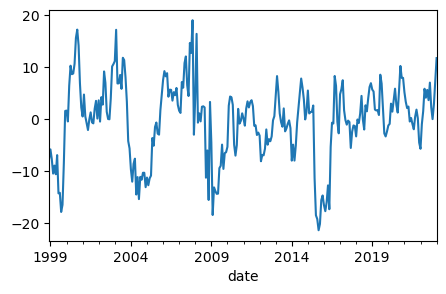

In [29]:
df_sample['F12.ann_ret'].plot(figsize=(5,3))
plt.show()

## EDA Analysis

In [30]:
corr=df_sample.corr()
corr.round(2)

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth
krw_gbp_xr,1.00,-0.38,-0.95,-0.41,0.32,0.22,-0.03,0.59,-0.23,-0.38,0.31
F12.ann_ret,-0.38,1.00,0.21,-0.37,0.08,0.12,0.06,-0.06,-0.08,-0.01,-0.06
New Real XR_GBKR,-0.95,0.21,1.00,0.47,-0.43,-0.38,-0.01,-0.63,0.26,0.51,-0.40
ca_gdp_korea,-0.41,-0.37,0.47,1.00,-0.31,-0.14,0.13,-0.36,0.30,0.13,0.26
ca_gdp_gb,0.32,0.08,-0.43,-0.31,1.00,0.26,0.05,0.23,-0.13,-0.38,0.53
gdp_growth_korea,0.22,0.12,-0.38,-0.14,0.26,1.00,0.45,0.20,-0.10,-0.30,0.33
gdp_growth_gb,-0.03,0.06,-0.01,0.13,0.05,0.45,1.00,-0.04,-0.07,0.00,0.14
infl_diff,0.59,-0.06,-0.63,-0.36,0.23,0.20,-0.04,1.00,-0.26,-0.29,0.22
int_rate_diff,-0.23,-0.08,0.26,0.30,-0.13,-0.10,-0.07,-0.26,1.00,0.20,-0.06
reserves_to_gdp,-0.38,-0.01,0.51,0.13,-0.38,-0.30,0.00,-0.29,0.20,1.00,-0.41


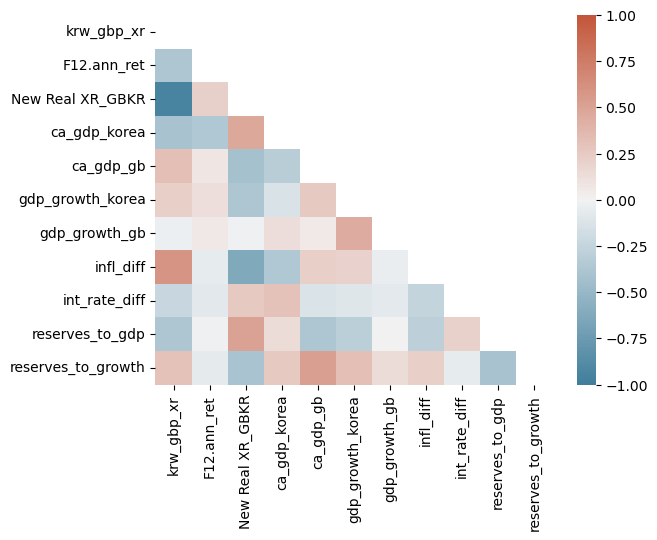

In [31]:
import seaborn as sns
import numpy as np

cmap=sns.diverging_palette(230, 20, as_cmap=True)
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)
plt.show()

# 1. OLS

## 1-1) 기존 거시경제 변수(외환보유고 제외)

In [32]:
import statsmodels.api as sm
sm.OLS(df_sample['F12.ann_ret'], sm.add_constant(df_sample.iloc[:, 2:-2])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.48
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           8.61e-28
Time:                        07:13:21   Log-Likelihood:                -922.73
No. Observations:                 290   AIC:                             1861.
Df Residuals:                     282   BIC:                             1891.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.4831      3.268     -8.104      0.000     -32.916     -20.050
New Real XR_GBKR    46.7664      4.779      9.786      0.000      37.360      56.173
ca_gdp_korea        -1.8883      0.176    -10.717      0.000      -2.235      -1.541
ca_gdp_gb            0.6014      0.319      1.883      0.061      -0.027       1.230
gdp_growth_korea     0.6097      0.151      4.038      0.000       0.312       0.907
gdp_growth_gb        0.0675      0.096      0.706      0.481      -0.121       0.256
infl_diff            0.4584      0.345      1.327      0.186      -0.222       1.138
int_rate_diff       -0.1736      0.366     -0.475      0.635      -0.894       0.547
==============================================================================
Omnibus:                        3.415   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.158
Skew:                           0.249   Prob(JB):                        0.206
Kurtosis:                       3.115   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1-2) 기존 거시경제 변수(외환보유고 포함)
* 포함시 설명력 증가. 한국의 외환보유고에 따른 외환 정책이 원-파운드 환율에 유의미한 영향을 끼치는 사실을 알 수 있음

In [33]:
sm.OLS(df_sample['F12.ann_ret'], sm.add_constant(df_sample.iloc[:, 2:])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     38.53
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           3.86e-44
Time:                        07:13:21   Log-Likelihood:                -879.15
No. Observations:                 290   AIC:                             1778.
Df Residuals:                     280   BIC:                             1815.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -36.1778      3.655     -9.899      0.000     -43.372     -28.983
New Real XR_GBKR      69.0447      4.731     14.593      0.000      59.731      78.358
ca_gdp_korea          -3.3363      0.214    -15.594      0.000      -3.757      -2.915
ca_gdp_gb             -1.5497      0.353     -4.391      0.000      -2.244      -0.855
gdp_growth_korea       0.3128      0.134      2.334      0.020       0.049       0.577
gdp_growth_gb          0.1580      0.083      1.893      0.059      -0.006       0.322
infl_diff              0.2784      0.299      0.930      0.353      -0.311       0.867
int_rate_diff          0.2783      0.320      0.869      0.386      -0.352       0.909
reserves_to_gdp       -0.3900      0.107     -3.636      0.000      -0.601      -0.179
reserves_to_growth     0.2435      0.027      8.910      0.000       0.190       0.297
==============================================================================
Omnibus:                        2.322   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.358
Skew:                           0.181   Prob(JB):                        0.308
Kurtosis:                       2.747   Cond. No.                         534.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
columns=[
    'New Real XR_GBKR',
    'ca_gdp_korea',
    'gdp_growth_korea',
    'gdp_growth_gb',
    'infl_diff',
    'int_rate_diff',
    'reserves_to_gdp',
]
results=sm.OLS(df_sample['F12.ann_ret'], sm.add_constant(df_sample[columns])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     29.70
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.33e-30
Time:                        07:13:21   Log-Likelihood:                -915.90
No. Observations:                 290   AIC:                             1848.
Df Residuals:                     282   BIC:                             1877.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -19.8019      3.583     -5.526      0.000     -26.855     -12.749
New Real XR_GBKR    52.2735      4.883     10.706      0.000      42.662      61.885
ca_gdp_korea        -2.0613      0.173    -11.936      0.000      -2.401      -1.721
gdp_growth_korea     0.5342      0.149      3.589      0.000       0.241       0.827
gdp_growth_gb        0.1190      0.094      1.264      0.207      -0.066       0.304
infl_diff            0.4615      0.337      1.370      0.172      -0.202       1.125
int_rate_diff        0.0292      0.361      0.081      0.936      -0.681       0.739
reserves_to_gdp     -0.4911      0.118     -4.161      0.000      -0.723      -0.259
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.806
Skew:                           0.142   Prob(JB):                        0.405
Kurtosis:                       3.263   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

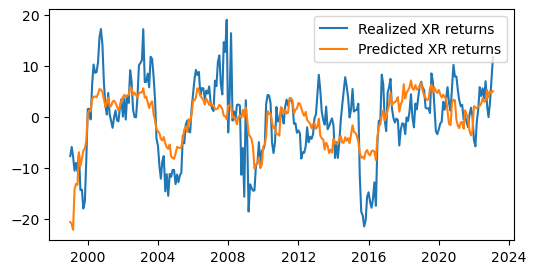

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)
plt.plot(df_sample['F12.ann_ret'], label='Realized XR returns')
plt.plot(df_sample.index, results.predict(), label='Predicted XR returns')
plt.legend()
plt.show()

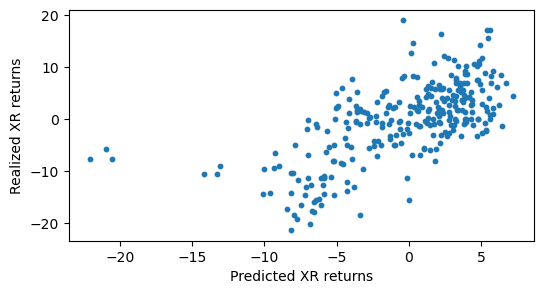

In [36]:
dict_kwargs={'figsize':(6, 3), }
plt.rc('figure', **dict_kwargs)
plt.scatter(results.predict(), df_sample['F12.ann_ret'], s=10)
plt.xlabel('Predicted XR returns')
plt.ylabel('Realized XR returns')
plt.show()

In [37]:
last_obs=df_merged.iloc[-1]

In [38]:
last_xr=last_obs['krw_gbp_xr']
last_xr

1695.85

In [39]:
exog=[1, *last_obs[columns], ]
pred_ret=results.predict(exog=exog)
pred_ret

array([4.42020836])

In [40]:
pred_xr=last_xr*(pred_ret[0]/100+1)
pred_xr

1770.810103431455

In [41]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#print(f'last xr = {last_xr}')

for alpha in [0.05, 0.25, 0.5, ]:
    (se, iv_l, iv_u, )=wls_prediction_std(results, exog=exog, alpha=alpha)
    print(f"Confidence interval at alpha = {alpha:.2f} : "
          f"{last_xr*(iv_l[0]/100+1):.2f} ~ {last_xr*(iv_u[0]/100+1):.2f} "
          f"[gap : {iv_u[0]-iv_l[0]:.2f}]")

Confidence interval at alpha = 0.05 : 1573.59 ~ 1968.03 [gap : 23.26]
Confidence interval at alpha = 0.25 : 1655.31 ~ 1886.31 [gap : 13.62]
Confidence interval at alpha = 0.50 : 1703.14 ~ 1838.48 [gap : 7.98]


## 1-3) 기존 거시경제 변수 - 모델 개선
* P-value 높은 거시경제 변수들 제거
* 설명력 0,006만 희생하며 불필요한 변수 제거하는데 성공

In [42]:
columns=[
    'New Real XR_GBKR',
    'ca_gdp_korea',
    'gdp_growth_korea',
#    'gdp_growth_gb',
#    'infl_diff',
#    'int_rate_diff',
    'reserves_to_gdp',
]
results=sm.OLS(df_sample['F12.ann_ret'], sm.add_constant(df_sample[columns])).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     51.07
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.17e-32
Time:                        07:13:22   Log-Likelihood:                -917.62
No. Observations:                 290   AIC:                             1845.
Df Residuals:                     285   BIC:                             1864.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.2464      3.069     -5.946      0.000     -24.287     -12.206
New Real XR_GBKR    49.1776      4.236     11.610      0.000      40.840      57.515
ca_gdp_korea        -2.0448      0.165    -12.377      0.000      -2.370      -1.720
gdp_growth_korea     0.6194      0.129      4.786      0.000       0.365       0.874
reserves_to_gdp     -0.4711      0.116     -4.050      0.000      -0.700      -0.242
==============================================================================
Omnibus:                        2.771   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.539
Skew:                           0.152   Prob(JB):                        0.281
Kurtosis:                       3.344   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
exog=[1, *last_obs[columns], ]
pred_ret=results.predict(exog=exog)
pred_ret

array([5.18157573])

In [44]:
pred_xr=last_xr*(pred_ret[0]/100+1)
pred_xr

1783.7217520384436

In [45]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#print(f'last xr = {last_xr}')

for alpha in [0.05, 0.25, 0.5, ]:
    (se, iv_l, iv_u, )=wls_prediction_std(results, exog=exog, alpha=alpha)
    print(f"Confidence interval at alpha = {alpha:.2f} : "
          f"{last_xr*(iv_l[0]/100+1):.2f} ~ {last_xr*(iv_u[0]/100+1):.2f} "
          f"[gap : {iv_u[0]-iv_l[0]:.2f}]")

Confidence interval at alpha = 0.05 : 1589.38 ~ 1978.06 [gap : 22.92]
Confidence interval at alpha = 0.25 : 1669.91 ~ 1897.53 [gap : 13.42]
Confidence interval at alpha = 0.50 : 1717.04 ~ 1850.40 [gap : 7.86]


# 2) NEW FEATURE 추가 후 OLS

## 2-1) Inflation Survey
* 향후 12개월에 인플레이션에 대한 BOE와 BOK의 서베이
* infl_diff와 동일한 방향으로 빼서 대용치가 될 수 있는지 실험
* 구매력평가설에 의하면 미래기대환율 / 현재환율 = 한국기대인플레이션 - 영국기대인플레이션

In [46]:
df = pd.read_excel('data/BOE_expected_inf.xlsx')
_df = pd.read_excel('data/BOK_expected_inf.xlsx')
df['date'] = pd.to_datetime(df['date'])
_df['date'] = pd.to_datetime(_df['date'])
df = df.set_index('date')
_df = _df.set_index('date')
df = df.resample('M').ffill()
_df = _df.resample('M').ffill()
new_df = df.merge(_df, left_index=True, right_index=True, how='inner')
new_df['expect_infl_difference'] = new_df['bok_expected_inf'] - new_df['boe_expected_inf']
df_sample = df_sample.join(new_df)
df_sample = df_sample.dropna()
df_sample.head()


,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference
date,,,,,,,,,,,,,,
2002-02-28,1883.74,-0.481489,0.578361,0.395295,-1.766119,5.7,2.1,0.861330,0.49,19.186411,10.235887,2.2,4.4,2.2
2002-03-31,1891.18,4.237037,0.576086,0.394583,-1.943976,7.0,1.5,0.539805,0.51,19.368922,12.332646,2.2,4.3,2.1
2002-04-30,1884.03,2.786580,0.578273,0.394583,-1.943976,7.0,1.5,0.885437,0.62,19.654376,15.165152,2.2,4.3,2.1
2002-05-31,1805.98,9.188917,0.603242,0.394583,-1.943976,7.0,1.5,1.768895,0.66,20.014808,17.082894,2.3,4.2,1.9
2002-06-30,1840.56,6.976681,0.591931,0.151549,-2.124992,7.5,1.6,1.525957,0.67,20.527588,19.291121,2.3,4.4,2.1


In [47]:
df_sample.tail()

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference
date,,,,,,,,,,,,,,
2022-09-30,1598.37,2.262930,0.789698,2.563071,-3.341623,3.1,2.0,-3.219088,0.10,22.919010,-10.174230,4.9,4.2,-0.7
2022-10-31,1645.96,-0.008506,0.766863,2.563071,-3.341623,3.1,2.0,-3.941384,0.30,22.767178,-11.764947,4.9,4.3,-0.6
2022-11-30,1591.14,2.843873,0.793284,2.563071,-3.341623,3.1,2.0,-4.352378,0.47,22.882619,-10.304360,4.8,4.2,-0.6
2022-12-31,1527.67,7.470200,0.799376,1.782102,-3.293495,1.4,0.6,-4.200037,0.24,25.279855,-8.627319,4.8,3.8,-1.0
2023-01-31,1517.32,11.766140,0.804826,1.782102,-3.293495,1.4,0.6,-3.736880,-0.21,25.686327,-6.837955,4.8,3.9,-0.9


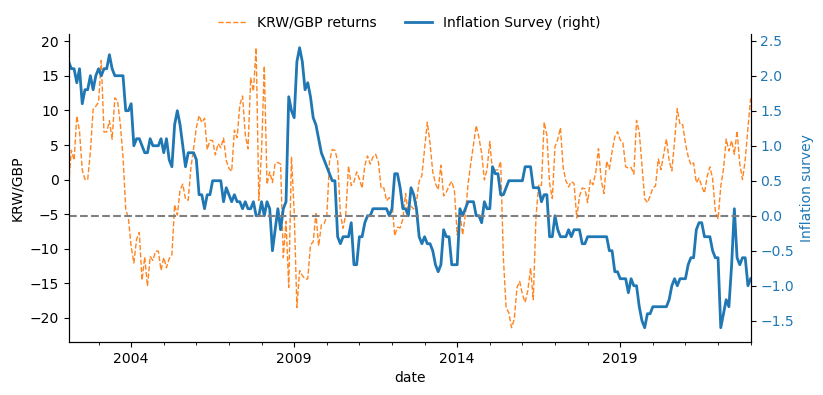

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(8.8, 4), sharey=True)
ax = axes # [0]

ax1 = df_sample['F12.ann_ret'].plot(label='KRW/GBP returns', lw=1, ls='--', color='#ff8521', ax=ax)
ax1.set_xlabel('')
ax1.set_ylabel('KRW/GBP')

ax2 = df_sample['expect_infl_difference'].plot(lw=2, secondary_y=True, ax=ax1, label='Inflation Survey')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('Inflation survey', color='tab:blue')

lns = ax1.get_lines() + ax2.get_lines()
lab = [l.get_label() for l in lns]
ax1.legend(lns, lab, frameon=False, loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, 1.1))

ax2.axhline(y=0, lw=1.5, ls='--', c='grey')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

## 2-2) Bloomberg UK Financial Condition Index
* 블룸버그에서 발표하는 영국의 전반적인 금융상황지수
* 자산가격 변동성, 은행 대출태도 등이 포함
* 서비스업 비중이 큰 영국에서 금융서비스업이 환율에 미치는 영향을 잡아내고자 포함하였음
* 금융시장 특성 상 가격반영이 빠르다고 판단, 동행지수로 사용

In [49]:
df = pd.read_excel('data/financial_cond.xlsx')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.resample('M').ffill()
df_sample = df_sample.join(df)
df_sample = df_sample.dropna()
df_sample.tail(3)


,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF
date,,,,,,,,,,,,,,,
2022-11-30,1591.14,2.843873,0.793284,2.563071,-3.341623,3.1,2.0,-4.352378,0.47,22.882619,-10.304360,4.8,4.2,-0.6,-0.462
2022-12-31,1527.67,7.470200,0.799376,1.782102,-3.293495,1.4,0.6,-4.200037,0.24,25.279855,-8.627319,4.8,3.8,-1.0,-0.232
2023-01-31,1517.32,11.766140,0.804826,1.782102,-3.293495,1.4,0.6,-3.736880,-0.21,25.686327,-6.837955,4.8,3.9,-0.9,0.195


In [50]:
df_sample.tail(3)

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF
date,,,,,,,,,,,,,,,
2022-11-30,1591.14,2.843873,0.793284,2.563071,-3.341623,3.1,2.0,-4.352378,0.47,22.882619,-10.304360,4.8,4.2,-0.6,-0.462
2022-12-31,1527.67,7.470200,0.799376,1.782102,-3.293495,1.4,0.6,-4.200037,0.24,25.279855,-8.627319,4.8,3.8,-1.0,-0.232
2023-01-31,1517.32,11.766140,0.804826,1.782102,-3.293495,1.4,0.6,-3.736880,-0.21,25.686327,-6.837955,4.8,3.9,-0.9,0.195


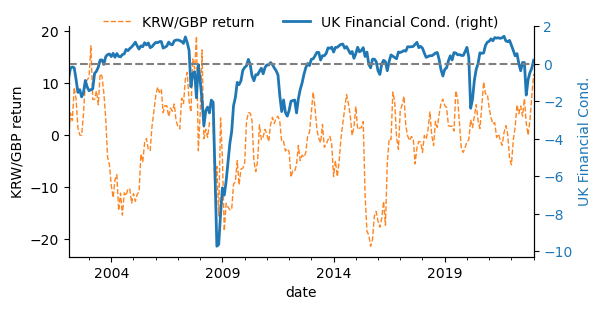

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
ax = axes # [0]

ax1 = df_sample['F12.ann_ret'].plot(label='KRW/GBP return', lw=1, ls='--', color='#ff8521', ax=ax)
ax1.set_xlabel('')
ax1.set_ylabel('KRW/GBP return')

ax2 = (df_sample['UKF']).plot(lw=2, secondary_y=True, ax=ax1, label='UK Financial Cond.')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('UK Financial Cond.', color='tab:blue')

lns = ax1.get_lines() + ax2.get_lines()
lab = [l.get_label() for l in lns]
ax1.legend(lns, lab, frameon=False, loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, 1.1))

ax2.axhline(y=0, lw=1.5, ls='--', c='grey')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

## 2-3) M2 diff
* 영국과 한국의 M2 유동성 차이
* 이자율에 간접적으로 영향
* int_rate_diff / infl_diff 등과 설명력 비교할 목적

In [52]:
df_kr_m2 = pd.read_excel('data/kr_m2.xlsx')
df_kr_m2['date'] = pd.to_datetime(df_kr_m2['date'])
df_kr_m2 = df_kr_m2.set_index('date')
df_kr_m2 = df_kr_m2.resample('M').ffill()
df_kr_m2 = df_kr_m2.pct_change(12)*100
df_uk_m2 = pd.read_excel('data/uk_m2.xlsx')
df_uk_m2['date'] = pd.to_datetime(df_uk_m2['date'])
df_uk_m2 = df_uk_m2.set_index('date')
df_uk_m2 = df_uk_m2.resample('M').ffill()
df_uk_m2 = df_uk_m2.pct_change(12)*100

df_sample.head()

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF
date,,,,,,,,,,,,,,,
2002-02-28,1883.74,-0.481489,0.578361,0.395295,-1.766119,5.7,2.1,0.861330,0.49,19.186411,10.235887,2.2,4.4,2.2,-0.720
2002-03-31,1891.18,4.237037,0.576086,0.394583,-1.943976,7.0,1.5,0.539805,0.51,19.368922,12.332646,2.2,4.3,2.1,-0.220
2002-04-30,1884.03,2.786580,0.578273,0.394583,-1.943976,7.0,1.5,0.885437,0.62,19.654376,15.165152,2.2,4.3,2.1,-0.163
2002-05-31,1805.98,9.188917,0.603242,0.394583,-1.943976,7.0,1.5,1.768895,0.66,20.014808,17.082894,2.3,4.2,1.9,-0.206
2002-06-30,1840.56,6.976681,0.591931,0.151549,-2.124992,7.5,1.6,1.525957,0.67,20.527588,19.291121,2.3,4.4,2.1,-0.824


In [53]:
df_sample = df_sample.join(df_kr_m2)
df_sample = df_sample.join(df_uk_m2)
df_sample = df_sample.dropna()

df_sample.tail(3)

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF,M2-KR,M2-UK
date,,,,,,,,,,,,,,,,,
2022-11-30,1591.14,2.843873,0.793284,2.563071,-3.341623,3.1,2.0,-4.352378,0.47,22.882619,-10.304360,4.8,4.2,-0.6,-0.462,5.873415,-6.100424
2022-12-31,1527.67,7.470200,0.799376,1.782102,-3.293495,1.4,0.6,-4.200037,0.24,25.279855,-8.627319,4.8,3.8,-1.0,-0.232,4.972379,-7.780133
2023-01-31,1517.32,11.766140,0.804826,1.782102,-3.293495,1.4,0.6,-3.736880,-0.21,25.686327,-6.837955,4.8,3.9,-0.9,0.195,4.430484,-4.614690


In [54]:
df_sample['M2_diff'] = \
    df_sample['M2-KR'] - df_sample['M2-UK']

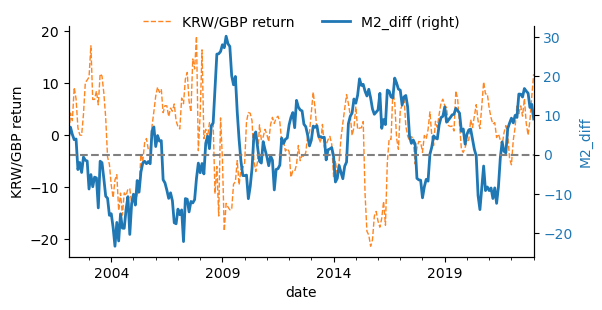

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
ax = axes # [0]

ax1 = df_sample['F12.ann_ret'].plot(label='KRW/GBP return', lw=1, ls='--', color='#ff8521', ax=ax)
ax1.set_xlabel('')
ax1.set_ylabel('KRW/GBP return')

ax2 = (df_sample['M2_diff']).plot(lw=2, secondary_y=True, ax=ax1, label='M2_diff')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('M2_diff', color='tab:blue')

lns = ax1.get_lines() + ax2.get_lines()
lab = [l.get_label() for l in lns]
ax1.legend(lns, lab, frameon=False, loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, 1.1))

ax2.axhline(y=0, lw=1.5, ls='--', c='grey')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

## 2-4) semiconductor
* 한국의 최대 수출품목인 반도체, 그중에서도 메모리반도체인 DRAM의 가격
* ca_gdp_korea 등과 설명력 비교 목적
* 가격지수이므로 Stationary를 위해 3개월 수익률 기준으로 계산

In [56]:
df = pd.read_excel('data/Semi.xls')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.resample('M').ffill()
df = df.pct_change(3)*100

df_sample = df_sample.join(df)
df_sample = df_sample.dropna()
df_sample.tail(3)

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF,M2-KR,M2-UK,M2_diff,Dram
date,,,,,,,,,,,,,,,,,,,
2022-11-30,1591.14,2.843873,0.793284,2.563071,-3.341623,3.1,2.0,-4.352378,0.47,22.882619,-10.304360,4.8,4.2,-0.6,-0.462,5.873415,-6.100424,11.973839,-20.396040
2022-12-31,1527.67,7.470200,0.799376,1.782102,-3.293495,1.4,0.6,-4.200037,0.24,25.279855,-8.627319,4.8,3.8,-1.0,-0.232,4.972379,-7.780133,12.752512,-19.144603
2023-01-31,1517.32,11.766140,0.804826,1.782102,-3.293495,1.4,0.6,-3.736880,-0.21,25.686327,-6.837955,4.8,3.9,-0.9,0.195,4.430484,-4.614690,9.045175,-13.930348


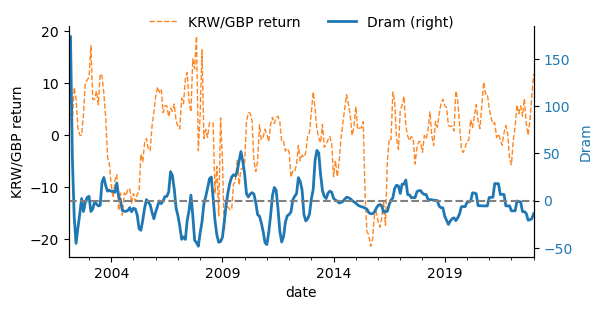

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
ax = axes # [0]

ax1 = df_sample['F12.ann_ret'].plot(label='KRW/GBP return', lw=1, ls='--', color='#ff8521', ax=ax)
ax1.set_xlabel('')
ax1.set_ylabel('KRW/GBP return')

ax2 = (df_sample['Dram']).plot(lw=2, secondary_y=True, ax=ax1, label='Dram')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('Dram', color='tab:blue')

lns = ax1.get_lines() + ax2.get_lines()
lab = [l.get_label() for l in lns]
ax1.legend(lns, lab, frameon=False, loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, 1.1))

ax2.axhline(y=0, lw=1.5, ls='--', c='grey')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

## 2-5) EMBI
* 신흥국의 달러화채권 발행 시 스프레드로 신흥국의 소버린리스크와 신흥국 기업의 크레딧 리스크를 측정
* 한국=EM, 영국=DM이라는 가정 하에 유의성 검증

In [58]:
df_embi = pd.read_excel('data/embi.xlsx')
df_embi['date'] = pd.to_datetime(df_embi['date'])
df_embi = df_embi.set_index('date')
df_embi = df_embi.resample('M').ffill()
df_embi = df_embi/100
df_embi.tail()

,EMBI
date,
2023-09-30,3.6191
2023-10-31,3.6592
2023-11-30,3.3859
2023-12-31,3.1894
2024-01-31,3.3406


In [59]:

df_sample = df_sample.join(df_embi)
df_sample = df_sample.dropna()
df_sample.head(3)

,krw_gbp_xr,F12.ann_ret,New Real XR_GBKR,ca_gdp_korea,ca_gdp_gb,gdp_growth_korea,gdp_growth_gb,infl_diff,int_rate_diff,reserves_to_gdp,reserves_to_growth,boe_expected_inf,bok_expected_inf,expect_infl_difference,UKF,M2-KR,M2-UK,M2_diff,Dram,EMBI
date,,,,,,,,,,,,,,,,,,,,
2002-02-28,1883.74,-0.481489,0.578361,0.395295,-1.766119,5.7,2.1,0.861330,0.49,19.186411,10.235887,2.2,4.4,2.2,-0.720,8.801620,4.151298,4.650321,174.216723,6.15
2002-03-31,1891.18,4.237037,0.576086,0.394583,-1.943976,7.0,1.5,0.539805,0.51,19.368922,12.332646,2.2,4.3,2.1,-0.220,11.086067,4.151298,6.934769,174.083171,5.68
2002-04-30,1884.03,2.786580,0.578273,0.394583,-1.943976,7.0,1.5,0.885437,0.62,19.654376,15.165152,2.2,4.3,2.1,-0.163,12.253680,7.165854,5.087826,45.775368,5.94


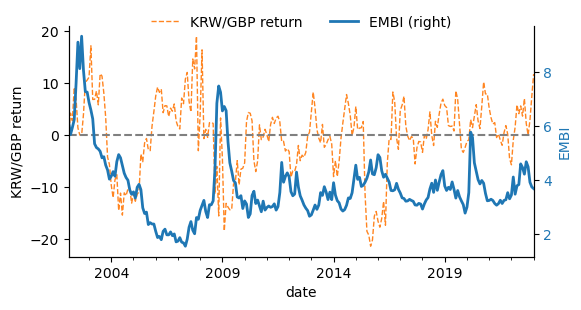

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3), sharey=True)
ax = axes # [0]

ax1 = df_sample['F12.ann_ret'].plot(label='KRW/GBP return', lw=1, ls='--', color='#ff8521', ax=ax)
ax1.set_xlabel('')
ax1.set_ylabel('KRW/GBP return')

ax2 = (df_sample['EMBI']).plot(lw=2, secondary_y=True, ax=ax1, label='EMBI')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('EMBI', color='tab:blue')

lns = ax1.get_lines() + ax2.get_lines()
lab = [l.get_label() for l in lns]
ax1.legend(lns, lab, frameon=False, loc='upper center', ncol=2,
           bbox_to_anchor=(0.5, 1.1))

ax1.axhline(y=0, lw=1.5, ls='--', c='grey')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

### 지금까지의 변수를 모두 활용하여 회귀분석

In [61]:
columns=[
    'New Real XR_GBKR',
    'ca_gdp_korea',
    'gdp_growth_korea',
    'gdp_growth_gb',
    'infl_diff',
    'int_rate_diff',
    'reserves_to_gdp',
    'expect_infl_difference',
    'UKF',
    'M2_diff',
    'Dram',
    'EMBI'

]

Y = df_sample['F12.ann_ret']
X = df_sample[columns]  # .iloc[:,1:-2] # exclude foreign reserves
X = sm.add_constant(X)
# X.head()
results=sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     20.99
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           3.79e-31
Time:                        07:13:25   Log-Likelihood:                -768.33
No. Observations:                 252   AIC:                             1563.
Df Residuals:                     239   BIC:                             1609.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.8814      7.786     -2.040      0.042     -31.219      -0.544
New Real XR_GBKR          52.5978      6.870      7.656      0.000      39.064      66.132
ca_gdp_korea              -2.9556      0.279    -10.587      0.000      -3.506      -2.406
gdp_growth_korea           0.5761      0.238      2.426      0.016       0.108       1.044
gdp_growth_gb              0.0024      0.100      0.024      0.981      -0.195       0.200
infl_diff                  1.1526      0.462      2.492      0.013       0.242       2.064
int_rate_diff              0.7524      0.401      1.876      0.062      -0.038       1.542
reserves_to_gdp           -0.4926      0.242     -2.039      0.043      -0.968      -0.017
expect_infl_difference    -0.7899      0.723     -1.093      0.275      -2.213       0.634
UKF                        1.4841      0.404      3.669      0.000       0.687       2.281
M2_diff                    0.0548      0.054      1.012      0.313      -0.052       0.161
Dram                       0.0030      0.015      0.204      0.838      -0.026       0.032
EMBI                      -0.4388      0.419     -1.048      0.296      -1.263       0.386
==============================================================================
Omnibus:                       12.777   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.617
Skew:                           0.490   Prob(JB):                      0.00110
Kurtosis:                       3.581   Cond. No.                         736.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 설명력은 51.3%로 높게 나오지만 단순 변수 추가로도 R-Square는 상승 가능하므로 의미 X
* 일부 변수의 높은 p-value값 확인
* 이는 동일한 환경을 설명하는 비슷한 변수들이 있어 다중공선성의 문제가 있는 것으로 파악됨
* 제거해야 할 변수를 선택하기 위해 VIF test를 통해 우선적으로 제거할 변수 확인

In [62]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df=pd.DataFrame()
vif_df["variable"] = add_constant(df_sample[columns].iloc[:,1:]).columns
vif_df['vif']=[variance_inflation_factor(add_constant(df_sample[columns].iloc[:,1:]).values, i) for i in range(add_constant(df_sample[columns].iloc[:,1:]).shape[1])]
vif_df

,variable,vif
0,const,354.887097
1,ca_gdp_korea,3.178228
2,gdp_growth_korea,2.216654
3,gdp_growth_gb,1.852919
4,infl_diff,2.794442
5,int_rate_diff,1.681391
6,reserves_to_gdp,2.875446
7,expect_infl_difference,2.969122
8,UKF,3.520612
9,M2_diff,3.036682


* VIF는 1~5 사이일 경우 큰 문제가 되지는 않음. 변수들은 대부분 VIF값 5 이내로 다중공선성 문제가 크지는 않음

In [63]:
columns=[
    'New Real XR_GBKR',
    'ca_gdp_korea',
    'gdp_growth_korea',
#    'gdp_growth_gb',
    'infl_diff',
    'int_rate_diff',
    'reserves_to_gdp',
    'expect_infl_difference',
    'UKF',
    'EMBI'
#   'M2_diff'
#   'Dram'

]

Y = df_sample['F12.ann_ret']
X = df_sample[columns]  # .iloc[:,1:-2] # exclude foreign reserves
X = sm.add_constant(X)
# X.head()
results=sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     28.08
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           4.63e-33
Time:                        07:13:25   Log-Likelihood:                -768.91
No. Observations:                 252   AIC:                             1558.
Df Residuals:                     242   BIC:                             1593.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.2085      7.674     -1.982      0.049     -30.324      -0.093
New Real XR_GBKR          53.7416      6.735      7.979      0.000      40.474      67.009
ca_gdp_korea              -2.8142      0.237    -11.850      0.000      -3.282      -2.346
gdp_growth_korea           0.5806      0.188      3.081      0.002       0.209       0.952
infl_diff                  0.9654      0.419      2.303      0.022       0.140       1.791
int_rate_diff              0.8370      0.383      2.188      0.030       0.083       1.591
reserves_to_gdp           -0.5614      0.230     -2.438      0.016      -1.015      -0.108
expect_infl_difference    -0.5650      0.682     -0.828      0.408      -1.909       0.779
UKF                        1.2518      0.315      3.970      0.000       0.631       1.873
EMBI                      -0.5169      0.408     -1.265      0.207      -1.321       0.288
==============================================================================
Omnibus:                       10.823   Durbin-Watson:                   0.663
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.060
Skew:                           0.462   Prob(JB):                      0.00397
Kurtosis:                       3.448   Cond. No.                         716.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
columns=[
    'New Real XR_GBKR',
    'ca_gdp_korea',
    'gdp_growth_korea',
#    'gdp_growth_gb',
    'infl_diff',
    'int_rate_diff',
    'reserves_to_gdp',
#    'expect_infl_difference',
    'UKF',
#    'EMBI'
#   'M2_diff'
#   'Dram'

]

Y = df_sample['F12.ann_ret']
X = df_sample[columns]  # .iloc[:,1:-2] # exclude foreign reserves
X = sm.add_constant(X)
# X.head()
results=sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     35.40
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           6.94e-34
Time:                        07:13:25   Log-Likelihood:                -770.71
No. Observations:                 252   AIC:                             1557.
Df Residuals:                     244   BIC:                             1586.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.2503      6.150     -3.780      0.000     -35.365     -11.136
New Real XR_GBKR    54.8934      5.723      9.592      0.000      43.620      66.166
ca_gdp_korea        -2.9125      0.232    -12.553      0.000      -3.369      -2.455
gdp_growth_korea     0.5378      0.184      2.923      0.004       0.175       0.900
infl_diff            0.6462      0.378      1.709      0.089      -0.099       1.391
int_rate_diff        0.6580      0.371      1.773      0.078      -0.073       1.389
reserves_to_gdp     -0.3239      0.192     -1.683      0.094      -0.703       0.055
UKF                  1.3638      0.279      4.896      0.000       0.815       1.913
==============================================================================
Omnibus:                       15.130   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.723
Skew:                           0.535   Prob(JB):                     0.000234
Kurtosis:                       3.670   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 영국 성장률, DRAM 가격, EMBI 인덱스를 제거하고 설명력 0.003 희생, P-value 안정화

In [65]:
last_obs=df_sample.iloc[-1]
last_xr=last_obs['krw_gbp_xr']
last_xr

1517.32

In [66]:
pred_xr=last_xr*(pred_ret[0]/100+1)
pred_xr

1595.9410848854388

In [67]:
exog=[1, *last_obs[columns], ]
pred_ret=results.predict(exog=exog)
pred_ret

array([5.88437201])

In [68]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#print(f'last xr = {last_xr}')

for alpha in [0.05, 0.25, 0.5, ]:
    (se, iv_l, iv_u, )=wls_prediction_std(results, exog=exog, alpha=alpha)
    print(f"Confidence interval at alpha = {alpha:.2f} : "
          f"{last_xr*(iv_l[0]/100+1):.2f} ~ {last_xr*(iv_u[0]/100+1):.2f} "
          f"[gap : {iv_u[0]-iv_l[0]:.2f}]")

Confidence interval at alpha = 0.05 : 1444.83 ~ 1768.38 [gap : 21.32]
Confidence interval at alpha = 0.25 : 1511.90 ~ 1701.31 [gap : 12.48]
Confidence interval at alpha = 0.50 : 1551.12 ~ 1662.08 [gap : 7.31]


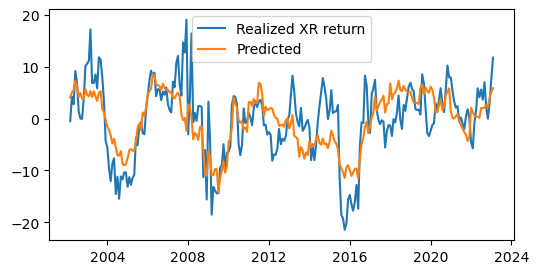

In [69]:
import matplotlib.pyplot as plt
plt.plot(Y, label='Realized XR return')
plt.plot(Y.index, results.predict(), label='Predicted')
plt.legend()
plt.show()